# Netflix Stocks Aanalysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
df = pd.read_csv("NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4874 non-null   object 
 1   Open       4874 non-null   float64
 2   High       4874 non-null   float64
 3   Low        4874 non-null   float64
 4   Close      4874 non-null   float64
 5   Adj Close  4874 non-null   float64
 6   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.7+ KB


(4874, 7)

In [5]:
sns.set(rc={'figure.figsize' : (10,5)})

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'Volume of Stock versus Time')

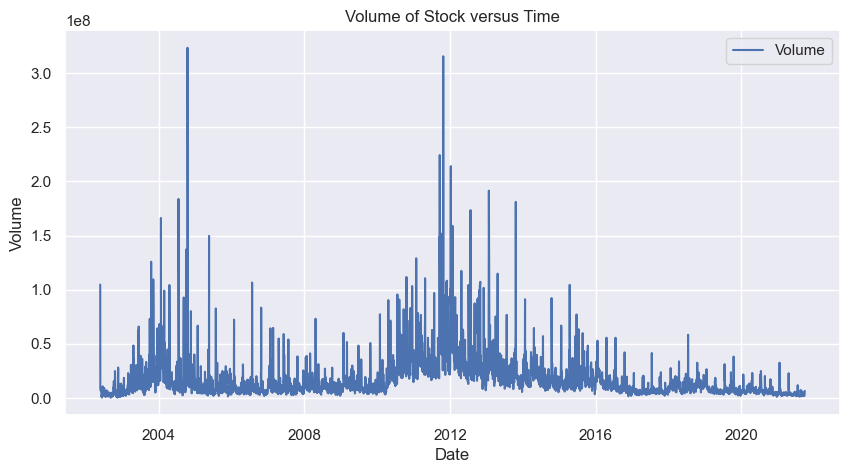

In [7]:
sns.lineplot(x= df.index, y = df['Volume'] , label = 'Volume')
plt.title("Volume of Stock versus Time")

<Axes: title={'center': 'Netflix Stock Price'}, xlabel='Date'>

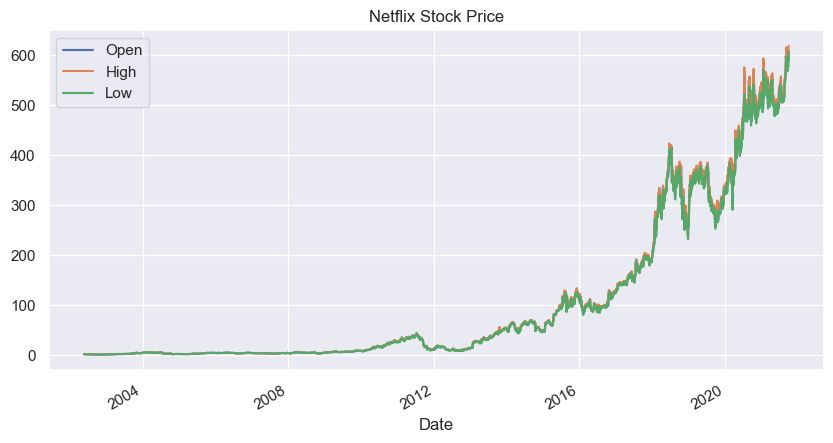

In [9]:
df.plot(y = ['Open', 'High', 'Low'], title = "Netflix Stock Price")

<Axes: xlabel='Year'>

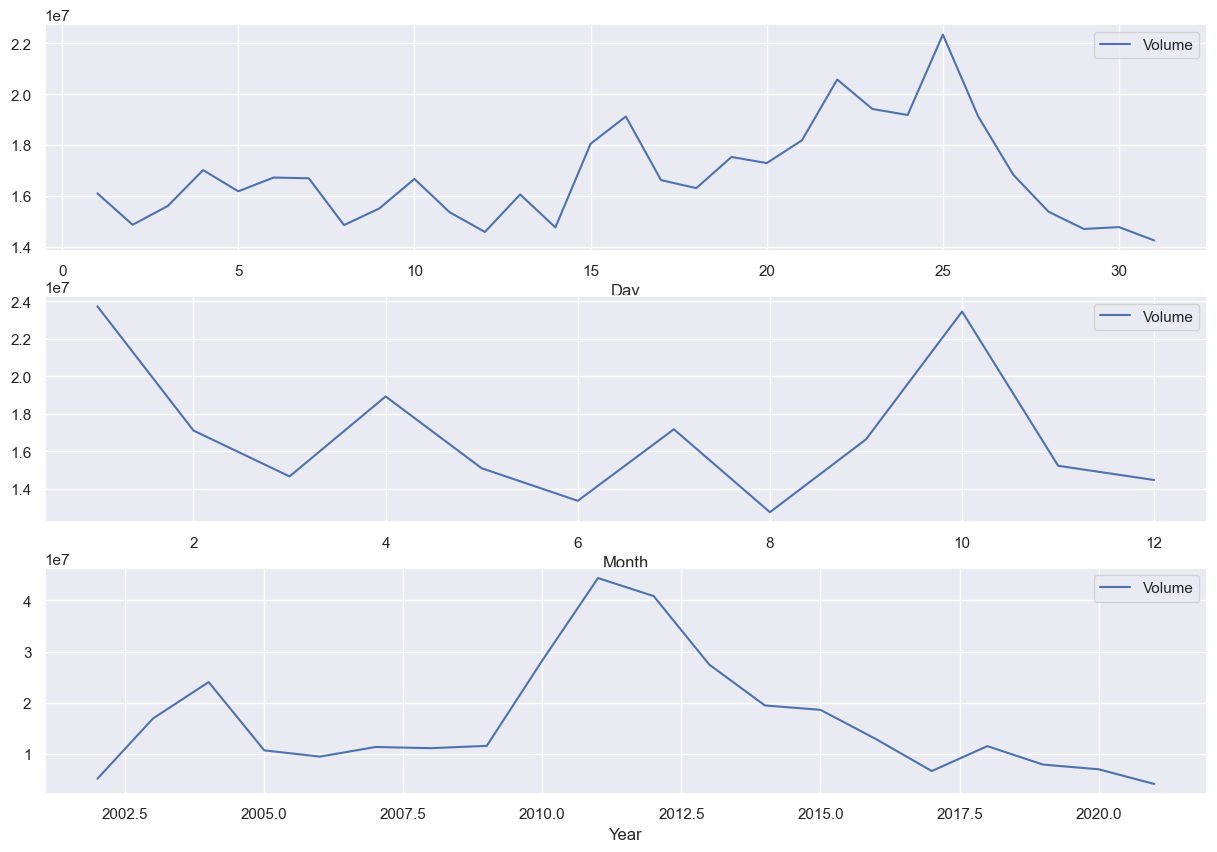

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize = (15, 10))
df.groupby(df.index.day).mean().plot(y='Volume', ax=ax1, xlabel = 'Day')
df.groupby(df.index.month).mean().plot(y='Volume', ax=ax2, xlabel = 'Month')
df.groupby(df.index.year).mean().plot(y='Volume', ax=ax3, xlabel = 'Year')

In [41]:
# Dates with Highest Stock Price
# Descending
a = df.sort_values(by = 'High', ascending = False)
a.head()['High']

Date
2021-09-30    619.000000
2021-09-08    615.599976
2021-09-07    613.849976
2021-09-29    609.880005
2021-09-10    609.450012
Name: High, dtype: float64

In [37]:
# sns.lineplot(y = a['High'], x = a.index, label = 'Stock High')

In [40]:
# Ascending 
a = df.sort_values(by = 'Low', ascending = True).head()
a['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

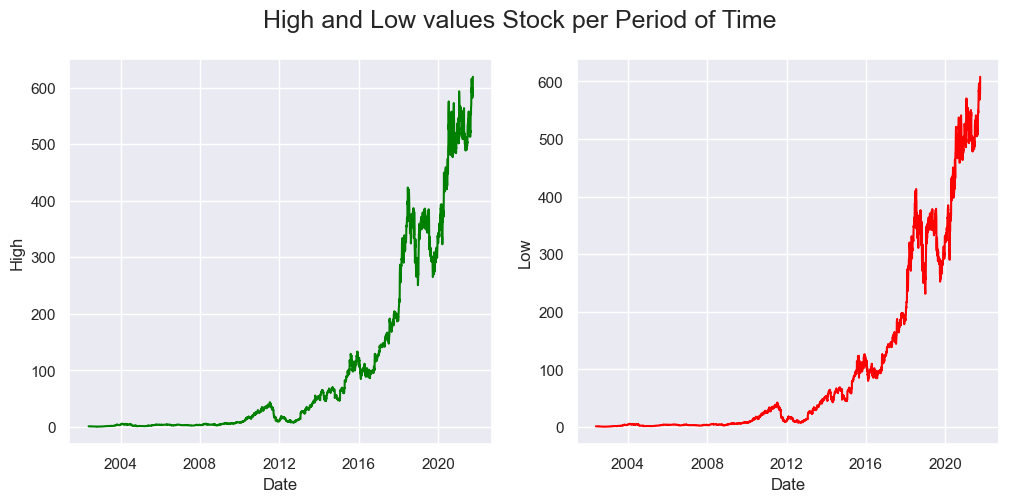

In [47]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,5))
fig.suptitle("High and Low values Stock per Period of Time", fontsize = 18)
sns.lineplot(ax = axes[0], y = df['High'], x = df.index, color = 'green')
sns.lineplot(ax = axes[1], y = df['Low'], x = df.index, color = 'red')